<a href="https://colab.research.google.com/github/MaiteVillalon/ADA-informes/blob/main/Quick_Sort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Descripción del Problema**
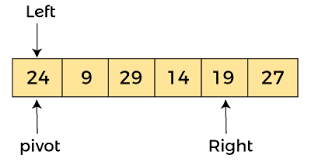

En informes anteriores hablamos sobre dos tipos de algoritmos, ordenamiento y optimización, en este informe retomaremos el primero de ellos. Cuando se nos presenta un problema en el cual necesitamos trabajar con nuestros datos ordenados podemos recurrir a diferentes algoritmos, ya analizamos dos de ellos que nos ayudan a resolver nuestra problematica, InsertionSort y MergeSort. En este informe analizaremos el QuickSort,  un algoritmo de ordenacion creado por el científico británico en computación C. A. R. Hoare. 



```
Entrada: Arreglo de n números [a1, a2, ...an] y dos 
variables l,h las cuales nos indican el comienzo y final del arreglo.

Salida: Arreglo de entrada ordenado de manera ascendente [a1, a2, ...an], tal que a1 < a2 < a3...< an.
```



##**Descripción del Algoritmo**

Como mencionamos anteriormente, QuickSort es un algortimo de ordenamiento.. Al igual que MergeSort se basa en el paradigma de "***divide y venceras***". El algortimo trabaja con un **pivote** y una función principal que realiza una parte escencial del algoritmo, veremos el funcionamiento de forma más detallada a continuación.


***Pasos importantes:***

**QuickSort**



*  El arreglo de n elementos de entrada se subdivide en dos subarreglos de tamaño (n/2).
*  Se ordena cada subarreglo llamando recursivamente a QuickSort.

**Función Partition**



*   Se elige un elemento del arreglo como **pivote**.
*   Se reubican en el los elementos del arreglo a los lados del pivote, de tal forma que los menores a este queden a su izquierda y los mayores a su derecha.

*   Quedan dos subarreglos a los lados del pivote, cada uno de ellos se ordenará recursivamente, hasta que los subarreglos contengan solo un elemento.

Como mencionamos en "Descripción del problema", el algoritmo recibe como entrada un arreglo de n números y dos indices indicando las posiciones del comienzo y final del arreglo.

Emtrega por salida el mismo arreglo de entrada pero ordenado de forma ascendente.

###**Ejemplo paso a paso**

Para este ejemplo usaremos el siguiente arreglo [2, 22, 5, 19] y consideraremos que se eligira el último elemento del arreglo como pivote.

Importante, con el fin de mostrar más implementaciones de Quicksort, en este ejemplo mostraremos el caso cuando **el elemento a comparar es menor al pivote y es puesto al comienzo del arreglo**, más adelante en los codigos y opcion verbose mostraremos cuando el elemento es mayor al pivote y es posicionado al final del arreglo.

[2, 22, 5, 19]

pivote = 19

ptr = 0

2 < 19 por ende **se intercambia de posición** con ptr 

arreglo despues del swap :[2, 22, 5, 19]

ptr = 1

22 > 19 por ende **no se cambia de posicion** y ptr sigue con el mismo valor

ptr = 1

arreglo despues del swap :[2, 22, 5, 19]

ptr = 1

5 < 19 por ende **intercambia de posicion** con ptr 

arreglo despues del swap :[2, 5, 22, 19]

ptr = 2

22 > 19 por ende **no se cambia de posicion** y ptr sigue con el mismo valor

Finalmente se intercambia de posición el pivote con ptr, el cual quedo con valor 2, obteniendo el siguiene arreglo:

**[2, 5, 19, 22]**

La función partition retornara la posición del pivote ( 2 ) y quicksort se llamara recursivamente para ordenar dos subarreglos, desde el comienzo del arreglo al pivote y desde el pivote al final.

Subarreglo1 [ 2 , 5 ]

Subarreglo2 [ 19 , 22 ]

***Trabajando con el subarreglo1***

arreglo despues del swap :[ 2, 5 ]

pivote = 5

ptr = 0

2 < 5 por ende **intercambia de posicion** con ptr

arreglo despues del swap :[ 2, 5 ]

ptr = 1

Finalmente se intercambia de posición el pivote con ptr, el cual quedo con valor 1, obteniendo el siguiene arreglo:

[ 2, 5 ]  podemos ver que el arreglo quedo igual ya que se encontraba previamente ordenado.

El arreglo se subdividira en dos subarreglo de un elemento cada uno, que trivialmente se asumen que se encuentran ordenados.

***Trabajando con el subarreglo2***

arreglo despues del swap :[ 19, 22 ]

pivote = 22

ptr = 0

19 < 22 por ende **intercambia de posicion** con ptr

arreglo despues del swap: [ 19, 22 ]

ptr = 1

El arreglo se subdividira en dos subarreglo de un elemento cada uno, que trivialmente se asumen que se encuentran ordenados.


Obtenemos el arreglo final **[2, 5, 19, 22]**.


##**Implementación del Algoritmo**

***Casos pivote:***
>Pivote en el último elemento

In [60]:
def partitionDer(array, l, h,cont,verbose=False):  

    #Se inicializan variables
    comien = l
    fin = h - 1
    piv = array[h]
    
    if (verbose == True):
        print("Pivote: ",piv)

  
    while comien < fin:
        cont[0] = cont[0] +1    
        
        #Busco algún número en el arreglo que sea menor al pivote
        while comien < h and array[comien] < piv:
            cont[0] = cont[0] +1
            comien = comien + 1

        #Busco algún número en el arreglo que sea mayor o igual al pivote
        while l < fin and array[fin] >= piv:
            cont[0] = cont[0] +1
            fin = fin - 1    

        # Si fin y comien nunca se cruzaron intercambiaran posiciones 
        if comien < fin:
          array[comien], array[fin] = array[fin], array[comien]
          cont[0] = cont[0] + 1
        else:
          cont[0] = cont[0] + 1



    if (array[comien] > piv): #si el número que se encuentra en la posición comien es mayor al pivote se intercambian
      cont[1] = cont[1] + 1
      if (verbose == True):
        print( array[comien], "es mayor a ", piv, " por ende intercambiaran de posición")
      array[comien], array[h] = array[h], array[comien]
    else:
      if (verbose == True):
        print( array[comien], "es menor a ", piv, " por ende  no intercambiaran de posición")
      cont[0] = cont[0] + 1
    if (verbose == True):
      print("Arreglo despues de haber realizado los swaps ",array)
    return comien

def quickSortDer(array, l, h,cont,verbose=False):
    if l < h:

      piv = partitionDer(array, l, h,cont,verbose)
      if (verbose == True):
        print("\nSubarreglo izquierdo:", array[:piv])
        print("Subarreglo derecho:",(array[piv:]))
      quickSortDer(array, l, piv - 1,cont,verbose)
      quickSortDer(array, piv + 1, h,cont,verbose)



***Casos pivote:***

>Pivote es igual al primer elemento del arreglo.

In [69]:

def partitionIzq(array, l, h,cont):  

#Se inicializan variables
    comien = l 
    fin = h 
    pivot = array[l]
    
    while comien < fin:

        cont[0] = cont[0] + 1
        
        #Busco algún número en el arreglo que sea menor al pivote
        while comien < h and array[comien] < pivot:
            cont[0] = cont[0] + 1
            comien = comien + 1

        #Busco algún número en el arreglo que sea mayor o igual al pivote
        while l < fin and array[fin] >= pivot:
            cont[0] = cont[0] + 1
            fin = fin - 1
     
         # Si fin y comien nunca se cruzaron intercambiaran posiciones 
        if comien < fin:
          array[comien], array[fin] = array[fin], array[comien]
          cont[0] = cont[0] + 1
        else:
          cont[0] = cont[0] + 1
                
    if (array[comien] > pivot):#si el número que se encuentra en la posición comien es mayor al pivote se intercambian
      cont[0] = cont[0] + 1
      array[comien], array[h] = array[h], array[comien]

    else:
      cont[0] = cont[0] + 1

    return comien

def quickSortIzq(array, l, h,cont):
    if l < h:
      cont[0] = cont[0] + 1
      piv = partitionIzq(array, l, h,cont)
      quickSortIzq(array, l, piv - 1,cont)
      quickSortIzq(array, piv + 1, h,cont)

cont = [0]
arr = [2, 10, 44, 19, 20, 3]
n = len(arr)
print(arr)
quickSortIzq(arr,0,n-1,cont)
print ("Arreglo ordenado:")
print(arr)

print("Comparaciones: ",cont[0])
 


[2, 10, 44, 19, 20, 3]
Arreglo ordenado:
[2, 3, 10, 19, 20, 44]
Comparaciones:  31


***Casos pivote:***


>Pivote es igual a la mediana entre tres elementos al azar del arreglo.




In [61]:
import random
import numpy as np

#Función para elegir la mediana entre tres números al azar del arreglo
def Mediana(array):
  largo = len(array)
  azar = [-1, -1, -1]
  for i in range (0,3):
    azar[i] = array[random.randint(0, n - 1)]
  
  np.sort(azar)
  num = array.index(azar[1])
  return num


def partitionMed(array, l, fin,comp):  
    pivot = array[Mediana(array)]
    izquierda = l
    Derecha = fin 
    
    while izquierda < Derecha:
        cont[0] = cont[0] + 1

        #Busco algún número en el arreglo que sea menor al pivote
        while izquierda < Derecha and array[izquierda] < pivot:
            cont[0] = cont[0] + 1
            izquierda = izquierda + 1

        #Busco algún número en el arreglo que sea mayor o igual al pivote
        while l < Derecha and array[Derecha] >= pivot:
            cont[0] = cont[0] + 1
            Derecha = Derecha - 1
         # Si izquierda y derecha nunca se cruzaron intercambiaran posiciones 
        if izquierda < Derecha:
          array[izquierda], array[Derecha] = array[Derecha], array[izquierda]
          comp[0] = comp[0] + 1
        else:
          cont[0] = cont[0] + 1
                
    if (array[izquierda] > pivot):#si el número que se encuentra en la posición comien es mayor al pivote se intercambian
      cont[0] = cont[0] + 1
      array[izquierda], array[fin] = array[fin], array[izquierda]
    else:
      cont[0] = cont[0] + 1
    return izquierda

def quickSortMed(array, l, h,cont):
    if l < h:
      cont[0] = cont[0] + 1
      pivote = partitionMed(array, l, h,cont)
      quickSortMed(array, l, pivote - 1,cont)
      quickSortMed(array, pivote + 1, h,cont)

print("Quick sort con pivote a la mitad del arreglo")

cont = [0]
arr = [2, 10, 44, 19, 20, 3]
n = len(arr)
quickSortMed(arr,0,n-1,cont)
print ("Arreglo ordenado:")
print(arr)

Quick sort con pivote a la mitad del arreglo
Arreglo ordenado:
[2, 3, 10, 19, 20, 44]


##**Opción verbose = True**

In [62]:
cont = [0,0]
arr = [4, 5, 1, 2, 3]
print("Arreglo de entrada: " ,arr)
print("\n")
quickSortDer(arr, 0, len(arr)-1,cont,verbose=True)
print("Arreglo ordenado: ",arr)

Arreglo de entrada:  [4, 5, 1, 2, 3]


Pivote:  3
5 es mayor a  3  por ende intercambiaran de posición
Arreglo despues de haber realizado los swaps  [2, 1, 3, 4, 5]

Subarreglo izquierdo: [2, 1]
Subarreglo derecho: [3, 4, 5]
Pivote:  1
2 es mayor a  1  por ende intercambiaran de posición
Arreglo despues de haber realizado los swaps  [1, 2, 3, 4, 5]

Subarreglo izquierdo: []
Subarreglo derecho: [1, 2, 3, 4, 5]
Pivote:  5
4 es menor a  5  por ende  no intercambiaran de posición
Arreglo despues de haber realizado los swaps  [1, 2, 3, 4, 5]

Subarreglo izquierdo: [1, 2, 3]
Subarreglo derecho: [4, 5]
Arreglo ordenado:  [1, 2, 3, 4, 5]


##**Propiedades del Algoritmo**

Hasta el momento hemos visto de que trata el algoritmo **QuickSort**, que problema intenta solucionar, sus pasos más importantes y su implementación. Ahora analizaremos las propiedades de este, nos detendremos a analizar tanto su **correctitud** como su **tiempo de ejecución**.


###**Correctitud**

***Teorema de correctitud 1 (Función Partition)***

La función Partition recibe por parametro un arreglo A[p..r], lo reorganiza y retorna un índice **q** de tal forma que los elementos del arreglo **A[p..q-1]** **son menores o iguales a A[q]** y los elementos del arreglo **A[q+1..r]** **son mayores a A[q].**

***Prueba del Teorema***

Para probar el teorema 1 utilizaremos una propiedad invariante de bucle, probando que se cumple en las tres instancias recesarias.

**Propiedad invariante de bucle:** Al comienzo de cada iteración, para cualquier indice k , tendremos que:

>Si p≤k≤i, entonces A[k]≤A[r]

>Si i<k<j, entonces A[k]>A[r]

**Inicialización**: Si miramos la imagen de a continuación, podremos ver que antes de la primera iteración del loop for, las variables i y j estan inicializadas como i = p - 1 y j = p, por ende no existen elementos entre p e i, ni entre i + 1 y j - 1, por lo tanto podriamos decir que se cumple la propiedad invariante de bucle.


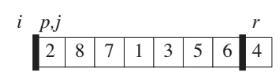

**Mantención:** Una vez inicializado el loop for, tenemos dos casos:


*   A[ j ] <=  A[ r ]
*   A[ j ]  >  A[ r ]

En el primer caso A[j] seria menor a nuestro o igual a nuestro pivote, por ende intercambiamos de posicion A[ j ] con A[ i ] y aumentamos i en una unidad. Una vez realizado el swap a[i] ahora es menor al pivote, cumpliendo la segunda condicion de la propiedad.

En el segundo caso A[ j ] es mayor a A[ r ], por ende no se realiza ningún swap y se sigue con el siguiente j, podemos ver que ahora el numero en la posición a[ j -1 ] ahora cumple con la primera condición de la propiedad.

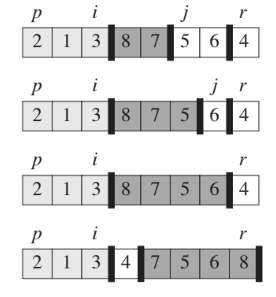

**Finalización**: Una vez finalizado el loop ( j = r ), cada uno de los elementos del array **será mayor al pivote**, **menor igual al pivote**, o **es el pivote.**

***Teorema de correctitud 2 (Algoritmo QuickSort)*** 

QuickSort recibe un arreglo de números por parametro, lo ordena y entrega por salida el arreglo ordenado de forma ascendente.

Probaremos el teorema de correctitud 2 utilizando inducción.

**Caso base :** Existe solo un elemento en el arreglo, por ende trivialmente asumimos que se encuentra ordenado.

Basandonos en el teorema 1 de correctitud asumiremos que la función Partition funciona correctamente.

Si **n = 2**, la función partition dividirá el arreglo en dos subarreglos de tamaño 1, los cuales serán ordenado correctamente basandonos en nuestro caso base.

Si **n = 3**, la función partition dividirá eñ arreglo en dos subarreglo de tamaño 1 y 2, los cuales serán ordenados de manera correcta basandonos en los dos casos anteriores.

De esta forma se cumplira el teorema 2 para arreglos de cualquier tamaño n.

##**Tiempo de ejecución**

A continuación analizaremos el tiempo de ejecución del algoritmo QuickSort.

El rendimiento del algoritmo dependerá de que elemento elijamos como pivote, es decir, en que posición se realizara la división del arreglo.

**Peor Caso**

El peor caso que podría experimentar quickSort sería que  la función partition  dividierá el arreglo en un subarreglo de tamaño ( n - 1 ) y otro de tamaño 0. Además, consideraremos que para cada llamada a la función partition ocurriría la misma división anterior.

Dividir el arreglo en 2 subarreglos tiene un costo de ejecución de O( n ), por ende obtenemos la siguiente función de recurrencia.



```
T( n ) = T( n - 1 ) + T( 0 ) + O( n )

T( 0 ) = O( 1 ), por ende...

T( n ) = T( n - 1 ) + O( n )
```

**Árbol de Recursión**

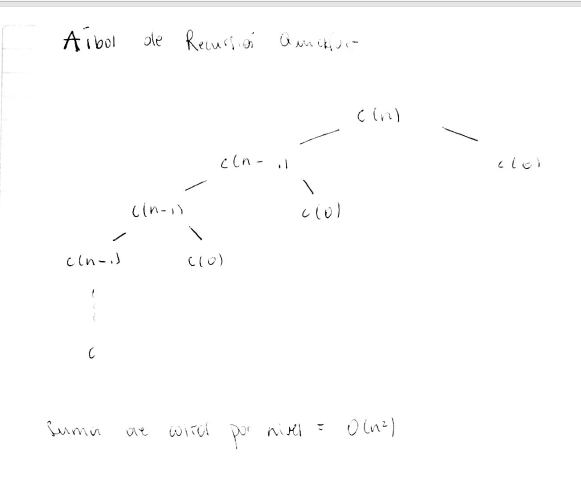


Utilizando inducción obtenemos:

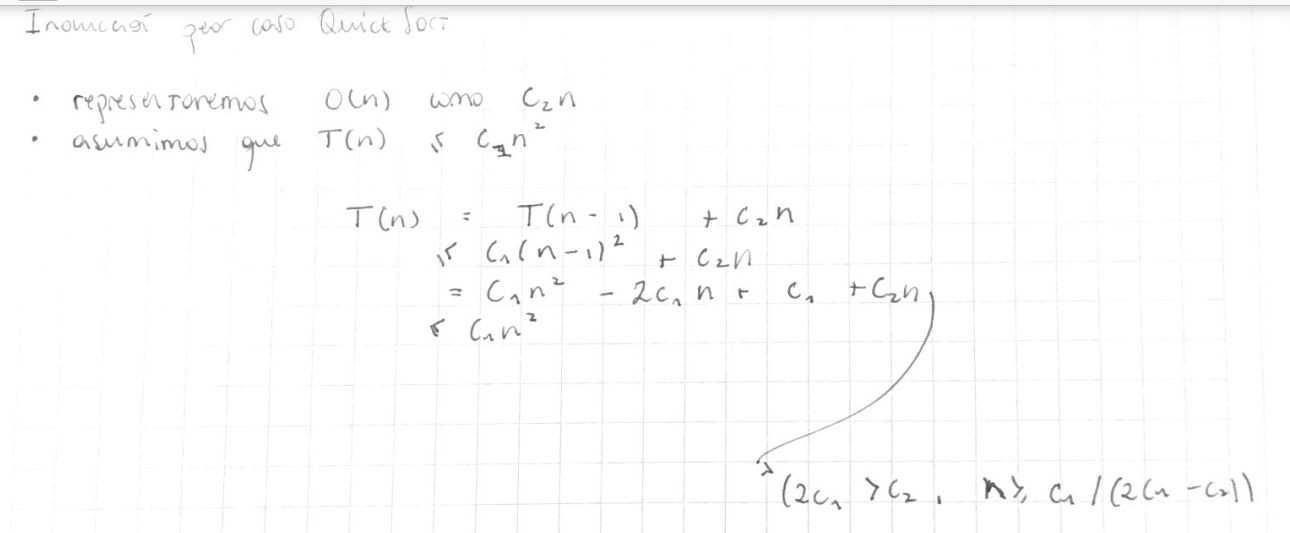



Finalmente concluimos que el tiempo de ejecución de QuickSort en su peor caso es de O( n^2 )


***Mejor Caso***

El mejor caso para QuickSort ocurrirá cuando la partición sea lo más balanceada posible en cada iteración de partition. Partition producira dos subarreglos, uno de tamaño ( n/2 ) y otro de tamaño ( n/2 ) - 1. Para obtener la función de recurrencia elminaremos la resta de un elemento a un subarreglo, recordando que el costo de tiempo parwa realizar la partición es de O( n ), obtenemos la siguiente función de recurrencia.


```
T( n ) = 2T( n/2 ) + O( n )
```

***Utilizando Teorema Maestro***

Tenemos las constantes a = 2, b = 2 y d = 1. 

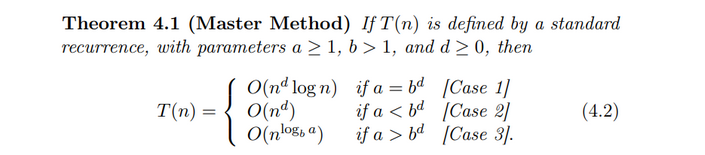

Podemos ver que se cumple con la primera condicion del teorema Maestro, por ende el tiempo de ejecución en el mejor caso será de ***O ( n log n )***

***Caso Promedio***

Analizar el caso promedio de QuickSort no es tan senciillo como su mejor y peor caso. Para simpificar la explicación consideraremos que partititon realizará tanto "buenos swaps" como "malos swaps", es decir ocurriran intercaladamente el mejor y peor caso. 

Observandolo a traves de un arbol de ejecución, tendriamos algo así.

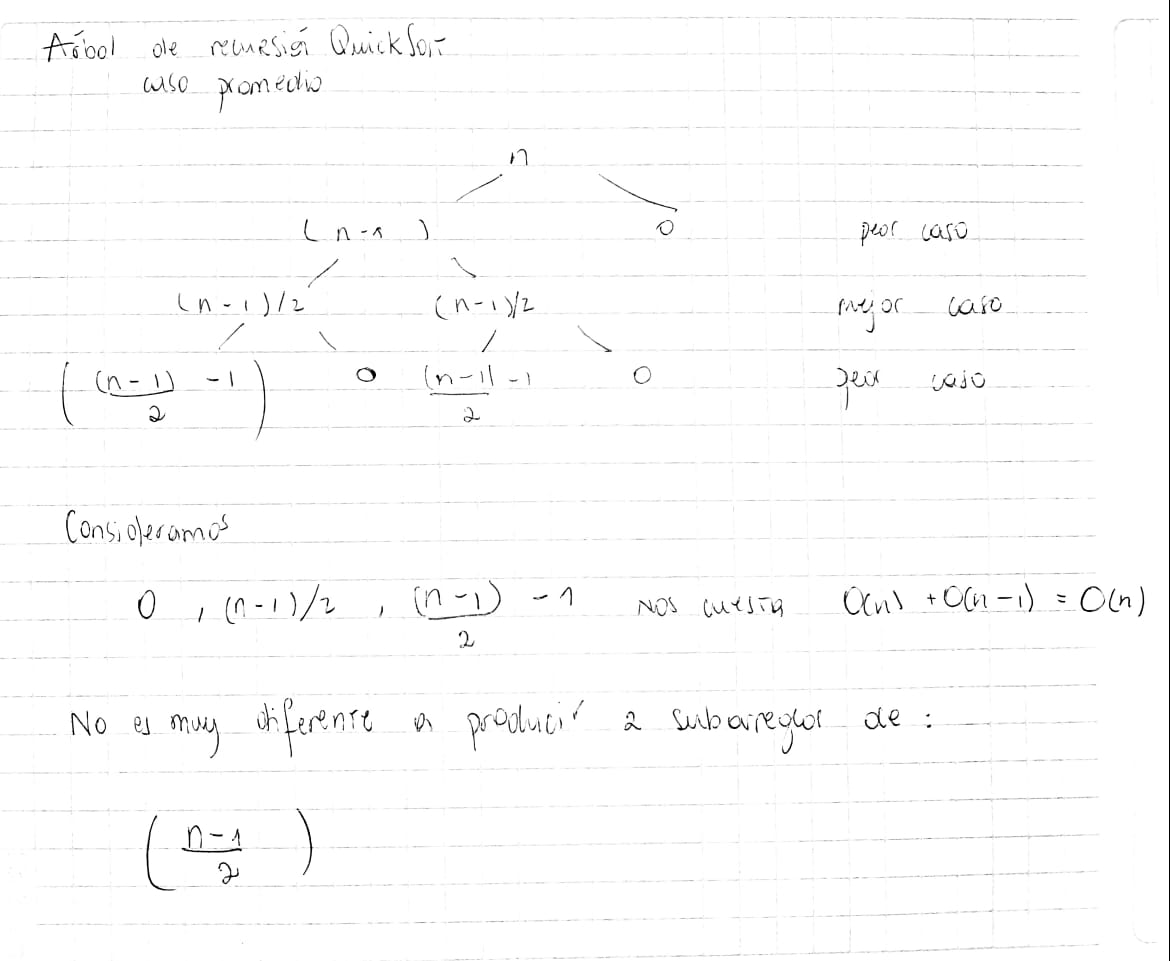

Como se menciona en la imagen la combinacion de mejor y peor caso no es mucho peor que tener solo casos buenos, por ese motivo el caso promedio se acerca al mejor caso.

##**Experimentos**

Realizaremos una serie de experimentos con los algoritmos MergeSort e Insertion, analizaremos los resultados y mostraremos conclusiones.
Cantidad de comparaciones

A continuacion se muestra un gráfico en el cual se realizaron las siguientes comparaciones.

1. Número de comparaciones realizadas experimentalmente con el mejor y peor caso teóricos.
2. Algoritmo QuickSort v/scon MergeSort.
3. Rendimiento segun ubicación del pivote

Todos los casos tiene arreglo de tamaño n ϵ [5,19], los arreglos de entrada son generados aleatoriamente en un rango de [1 , 100 ].


##**QuickSort mejor y peor caso**

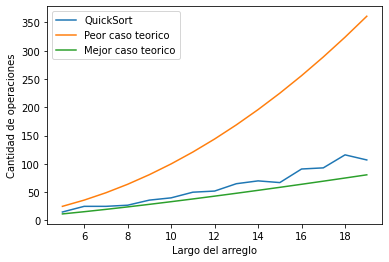

In [ ]:
import matplotlib.pyplot as plt 
from math import log2
import random


x=[n for n in range(5,20)] 
y1=[n**2 for n in range(5,20)] #peor caso teorico
y2=[n*log2(n) for n in range(5,20)] #mejor caso teorico
y=[]; 

for n in range(5,20):
  contador = [0,0]
  arr = random.sample(range(1, 100), n)
  quickSortDer(arr,0, len(arr)-1,contador, verbose=False)
  y.append(contador[1])

plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)


plt.legend(["QuickSort", "Peor caso teorico", "Mejor caso teorico"])

plt.xlabel('Largo del arreglo')
plt.ylabel('Cantidad de operaciones')
plt.show()

**Conclusiones**

Podemos ver en el gráfico que el peor caso tiene un crecimiento cuadrático y tanto el mejor caso como el caso promedio tienen un crecimiento logaritico. Ademas podemos observar que claramente el caso promedio se acerca bastante al mejor caso, por ende volvemos a confirmar lo planteado en la sección de tiempo de ejecución. La cantidad de comparaciones en el  peor caso se aleja bastante de los otros dos casos, podemos notar que sobrepasan las 300 comparaciones si el largo del arreglo es mayor a 18, en cambio el mejor y peor caso solo realizan 150 comparaciones como máximp.

##**Merge v/s QuickSort**

Analizaremos el rendimiento de MergeSort y QuickSort

In [65]:

def merge(izq, der, contador, verbose):
    
    i, j = 0, 0 # Variables de incremento
    result = [] # Lista de resultado
 
   # Se elige el menor de los subarreglos
    while(i < len(izq) and j < len(der)):
        if (izq[i] < der[j]):
            result.append(izq[i])
            i += 1
            contador[1]= contador[1]+1
        else:
            result.append(der[j])
            j += 1
            contador[1]= contador[1]+1
            
 
   # Agregamos los resultados a la lista
    result += izq[i:]
    result += der[j:]
    contador[1]= contador[1]+1
 
    # Retornamos el resultados
    return result

In [66]:
def mergeSort(arr,contador, verbose):
    
    # Pregunto si el arreglo tiene más de un elemento
    if len(arr) > 1:

        # Calculo cual es la mitad del array
        #mitad = len(arr)//2
        mitad = len(arr)//2

        izq= (arr[:mitad])
        der=(arr[mitad:])
 
        # Con estas llamadas a MergeSort se ordenan los dos subarreglos 
        #  que se subdividio arr y luego se llama a la funcion merge para
        #  que los combine de forma ordenada.
        contador[0]= contador[0]+1
        mergeSort(izq, contador,verbose )
        mergeSort(der,contador ,verbose )
        arr[:]=merge(izq,der,contador, verbose)
 
 
# Driver code to test above
arr = [5,8,7,1,3]
n = len(arr)
print("Arreglo de entrada")
for i in range(n):
    print("%d" % arr[i],end=" ")
print("\n") 
contador = [0,0]
mergeSort(arr,contador, verbose= False)
print("\n\nArreglo ordenado")
for i in range(n):
    print("%d" % arr[i],end=" ")

print("\n")
print("cantidad de recursiones:" , contador[0])
print("cantidad de comparaciones:" , contador[1])

Arreglo de entrada
5 8 7 1 3 



Arreglo ordenado
1 3 5 7 8 

cantidad de recursiones: 4
cantidad de comparaciones: 12


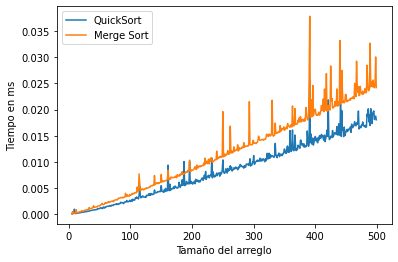

In [67]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random
from termcolor import colored
import copy




x=[]; y=[]
y1=[]

for n in range(5,500):

  a = random.sample(range(1, 1000), n)
  cont = [0,0]
  verbose = False
  #la función repeat está ejecutando 20 veces insertion_Sort con el arreglo a y retorna el mejor tiepo obtenido.
  #t1 = repeat(setup="from __main__ import quickSort_der", stmt=f"quickSort_der({a})", repeat=1, number=10)
  t1 = repeat(setup="from __main__ import quickSortDer", stmt=f"quickSortDer({a},{0},{n-1},{cont},{verbose})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import mergeSort", stmt=f"mergeSort({a},{cont},{verbose})", repeat=1, number=10)
  x.append(n)
  y.append(t1)
  y1.append(t2)


plt.plot(x, y)
plt.plot(x, y1)
plt.legend(["QuickSort", "Merge Sort"])

plt.xlabel('Tamaño del arreglo')
plt.ylabel('Tiempo en ms')
plt.show()

##**Resultados**

Si observamos el gráfico de arriba, podemos notar que MergeSort demora mucho más en ejecturse por completo que QuickSort, podemos atribuirlo a diferentes motivos, uno de ellos es que para mergesort no existe mejor caso, siempre se ejecutara de igual forma, no así quickSort, que en su mejor caso es bastante eficiente. Podemos ver algunos peaks, los cuales asociamos a comportamientos impredecibles del compilador.

##**QuickSort, ubicaciones pivotes**

Finalmente analizaremos la cantidad de comparaciones que realiza QuickSort dependiendo de que elemento eligamos como pivote,

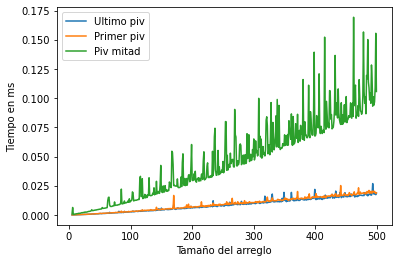

In [71]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random
from termcolor import colored
import copy




x=[]; y=[]
y1=[]
y2=[]

for n in range(5,500):

  a = random.sample(range(1, 1000), n)
  cont = [0,0]
  verbose = False
  #la función repeat está ejecutando 20 veces insertion_Sort con el arreglo a y retorna el mejor tiepo obtenido.
  #t1 = repeat(setup="from __main__ import quickSort_der", stmt=f"quickSort_der({a})", repeat=1, number=10)
  t1 = repeat(setup="from __main__ import quickSortDer", stmt=f"quickSortDer({a},{0},{n-1},{cont},{verbose})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import quickSortIzq", stmt=f"quickSortIzq({a},{0},{n-1},{cont})", repeat=1, number=10)
  t3 = repeat(setup="from __main__ import quickSortMed", stmt=f"quickSortMed({a},{0},{n-1},{cont})", repeat=1, number=10)
  x.append(n)
  y.append(t1)
  y1.append(t2)
  y2.append(t3)

plt.plot(x, y)
plt.plot(x, y1)
plt.plot(x, y2)
plt.legend(["Ultimo piv", "Primer piv", "Piv mitad"])

plt.xlabel('Tamaño del arreglo')
plt.ylabel('Tiempo en ms')
plt.show()

##**Conclusiones**

Si observamos el gráfico, podemos notar que cuando el pivote es posicionado segun la mediana demora mucho, esto puede deberse a que se utilia más tiempo encontrando la mediana de los números al azar. Tambien notamos que si el pivote es posicionado al comienzo o final del arreglo no cambia mucho el desempeño del algoritmo, lo que realmente puede alterarlo es si el arreglo viene ordenado de menor a mayor. 